In [3]:
import pandas as pd
import io

In [4]:
from google.colab import files

uploaded = files.upload()


Saving fashion_products_data.ldjson to fashion_products_data.ldjson


In [5]:
file_name = list(uploaded.keys())[0]
data = pd.read_json(io.BytesIO(uploaded[file_name]), lines=True)
data.head()

,uniq_id,crawl_timestamp,asin,product_url,product_name,image_urls__small,medium,large,browsenode,brand,...,colour,no__of_reviews,seller_name,seller_id,left_in_stock,no__of_offers,no__of_sellers,technical_details__k_v_pairs,formats___editions,name_of_author_for_books
0,26d41bdc1495de290bc8e6062d927729,2020-02-07 05:11:36 +0000,B07STS2W9T,https://www.amazon.in/Facon-Kalamkari-Handbloc...,LA' Facon Cotton Kalamkari Handblock Saree Blo...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968255e+09,LA' Facon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,410c62298852e68f34c35560f2311e5a,2020-02-07 08:45:56 +0000,B07N6TD2WL,https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...,Sf Jeans By Pantaloons Men's Plain Slim fit T-...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968123e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52e31bb31680b0ec73de0d781a23cc0a,2020-02-06 11:09:38 +0000,B07WJ6WPN1,https://www.amazon.in/LOVISTA-Traditional-Prin...,LOVISTA Cotton Gota Patti Tassel Traditional P...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968255e+09,LOVISTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25798d6dc43239c118452d1bee0fb088,2020-02-07 08:32:45 +0000,B07PYSF4WZ,https://www.amazon.in/People-Printed-Regular-T...,People Men's Printed Regular fit T-Shirt,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968123e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ad8a5a196d515ef09dfdaf082bdc37c4,2020-02-06 14:27:48 +0000,B082KXNM7X,https://www.amazon.in/Monte-Carlo-Cotton-Colla...,Monte Carlo Grey Solid Cotton Blend Polo Colla...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968070e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   uniq_id                        30000 non-null  object 
 1   crawl_timestamp                30000 non-null  object 
 2   asin                           30000 non-null  object 
 3   product_url                    30000 non-null  object 
 4   product_name                   30000 non-null  object 
 5   image_urls__small              29998 non-null  object 
 6   medium                         29998 non-null  object 
 7   large                          28841 non-null  object 
 8   browsenode                     29480 non-null  float64
 9   brand                          21857 non-null  object 
 10  sales_price                    27110 non-null  float64
 11  weight                         30000 non-null  object 
 12  rating                         30000 non-null 

From the above dataset I Calculated the important features such as
asin,
product_name,
image_urls,
brand,
sales_price,
rating,
sales_rank,
product_details,
technical_details,
colour,
size ,
material,
style

Visulaizing the dataset that contains the missing values

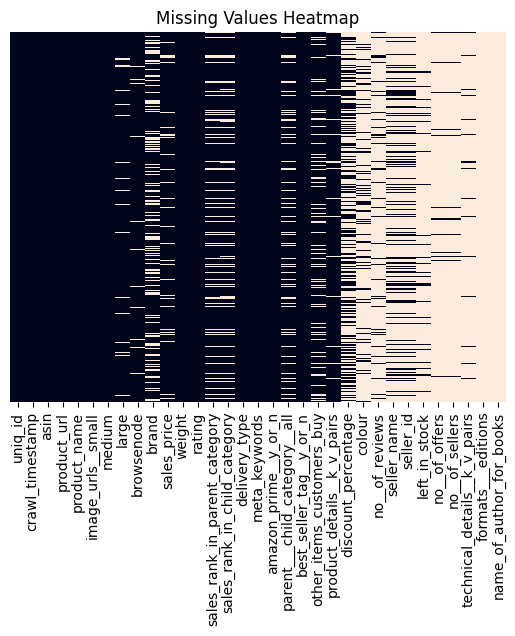

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull(),yticklabels=False, cbar=False)
plt.title('Missing Values Heatmap')
plt.show()


Filling the missing values in the important features

In [7]:
data['colour']=data['colour'].fillna('No Color')
data['sales_price'] = pd.to_numeric(data['sales_price'], errors='coerce')
data['sales_price']=data['sales_price'].fillna(data['sales_price'].median())
data['large']=data['large'].fillna('None')

Univariates analysis

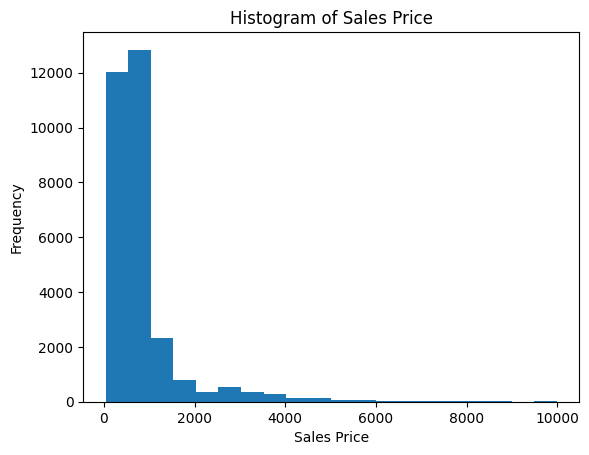

In [ ]:
plt.hist(data['sales_price'], bins=20)
plt.title('Histogram of Sales Price')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.show()

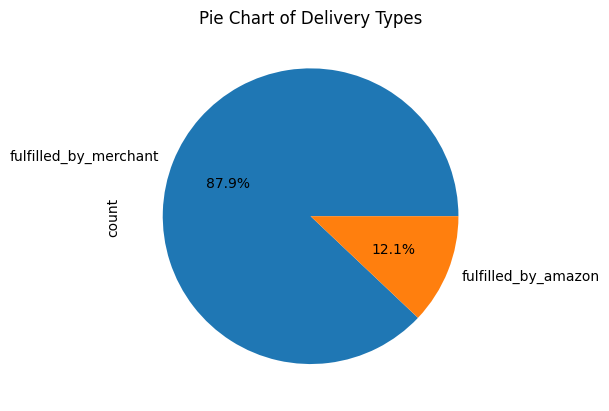

In [ ]:
# Pie chart of delivery types
data['delivery_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Delivery Types')
plt.show()

<ipython-input-26-f39ea5787a22>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='brand', data=top_10_data, order=top_10_brands, palette='husl')


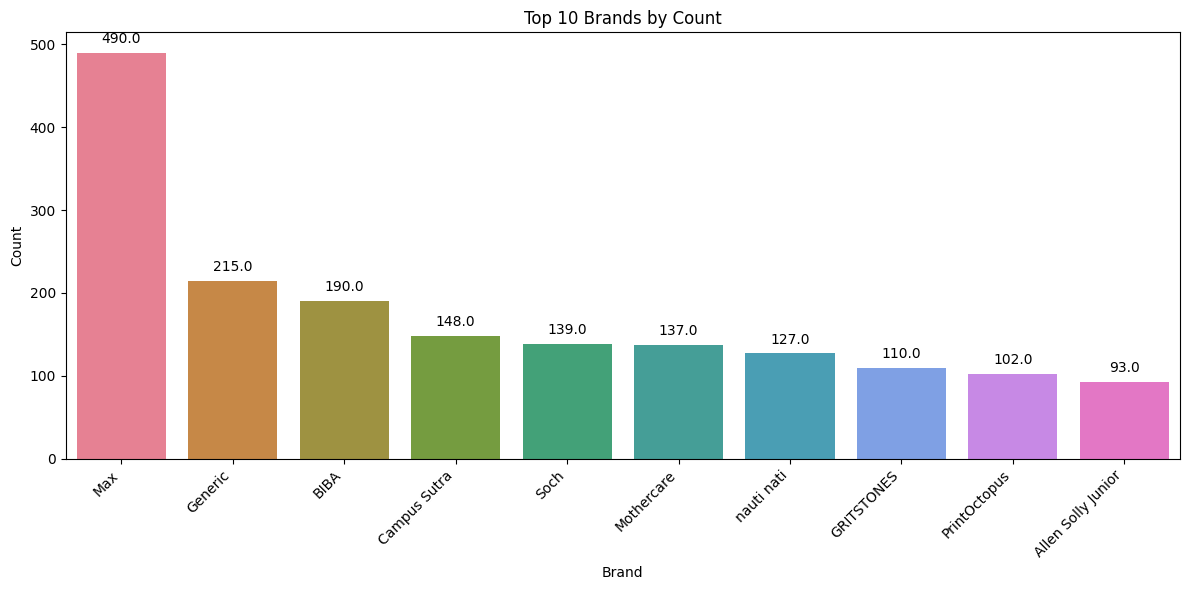

In [ ]:

top_10_brands = data['brand'].value_counts().nlargest(10).index


top_10_data = data[data['brand'].isin(top_10_brands)]


plt.figure(figsize=(12, 6))
ax = sns.countplot(x='brand', data=top_10_data, order=top_10_brands, palette='husl')
plt.title('Top 10 Brands by Count')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

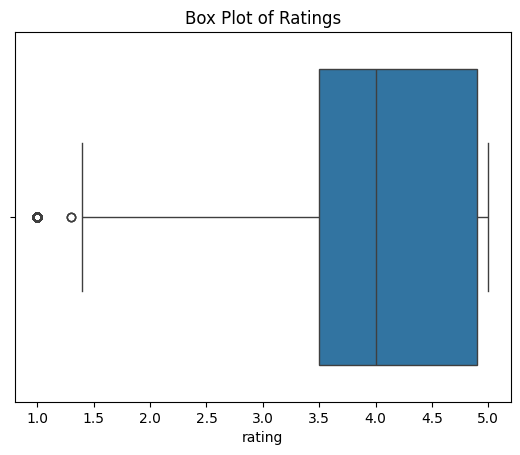

In [ ]:
sns.boxplot(x=data['rating'])
plt.title('Box Plot of Ratings')
plt.show()

Bivariate analysis

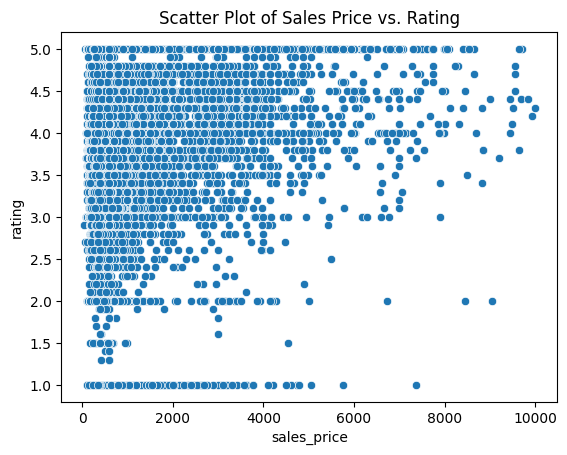

In [ ]:
sns.scatterplot(x='sales_price', y='rating', data=data)
plt.title('Scatter Plot of Sales Price vs. Rating')
plt.show()

As seen in the above scatter plot the salesprice and the rating contains the outliers so reamoving those outliers

In [ ]:
data['sales_price'] = pd.to_numeric(data['sales_price'], errors='coerce')
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')


def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out

numerical_features = ['sales_price', 'rating']

for feature in numerical_features:
    data = remove_outliers_iqr(data, feature)

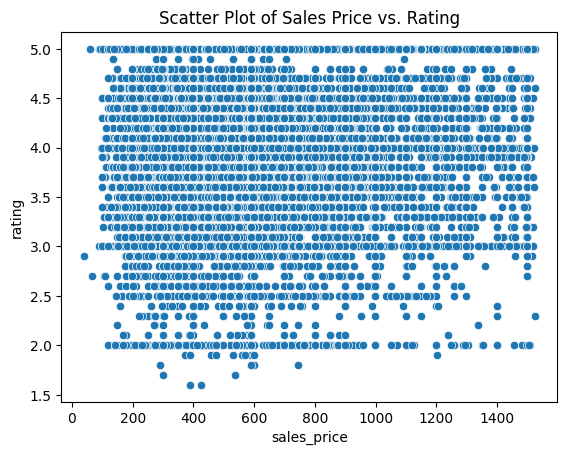

In [ ]:
sns.scatterplot(x='sales_price', y='rating', data=data)
plt.title('Scatter Plot of Sales Price vs. Rating')
plt.show()

Display the images that is given in the dataset using the Ipython library

In [ ]:
from IPython.display import Image
for index, row in data.head().iterrows():
    image_url = row['image_urls__small']
    display(Image(url=image_url))


In [9]:

import nltk
import re
from nltk.corpus import stopwords

In [10]:
nltk.download('stopwords')
def clean_product_name(text):
    text = re.sub(r"[^a-zA-Z0-9 ]", "", text)
    words = text.lower().split()
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    cleaned_text = " ".join(words)

    return cleaned_text


data['cleaned_product_name'] = data['product_name'].apply(clean_product_name)
print(data['cleaned_product_name'].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    la facon cotton kalamkari handblock saree blou...
1       sf jeans pantaloons mens plain slim fit tshirt
2    lovista cotton gota patti tassel traditional p...
3               people mens printed regular fit tshirt
4    monte carlo grey solid cotton blend polo colla...
Name: cleaned_product_name, dtype: object


In [11]:
def has_special_characters(text):

    pattern = r"[^a-zA-Z0-9 ]"
    if re.search(pattern, text):
        return True
    else:
        return False


data['has_special_chars'] = data['product_name'].apply(has_special_characters)
print(data[data['has_special_chars'] == True])
num_special_chars = data['has_special_chars'].sum()
print(f"Number of product names with special characters: {num_special_chars}")

                                uniq_id            crawl_timestamp  \
0      26d41bdc1495de290bc8e6062d927729  2020-02-07 05:11:36 +0000   
1      410c62298852e68f34c35560f2311e5a  2020-02-07 08:45:56 +0000   
2      52e31bb31680b0ec73de0d781a23cc0a  2020-02-06 11:09:38 +0000   
3      25798d6dc43239c118452d1bee0fb088  2020-02-07 08:32:45 +0000   
5      73fd23f631d4434fd4a41ecc1b9f5eed  2020-02-06 08:14:03 +0000   
...                                 ...                        ...   
29995  976b6bda7076509778da69eb3fe0f59c  2020-02-06 23:53:43 +0000   
29996  3006a520f71804b055d92216f5dc946d  2020-02-06 20:32:09 +0000   
29997  45ea7c463997f4cd91851617edbfee32  2020-02-06 19:55:44 +0000   
29998  2ecada524df6ff8c2d0c53a249cfcddc  2020-02-06 05:08:00 +0000   
29999  a4e77b9b1addb68bdfc4b178ac27e7c2  2020-02-06 23:32:41 +0000   

             asin                                        product_url  \
0      B07STS2W9T  https://www.amazon.in/Facon-Kalamkari-Handbloc...   
1      B07N6TD2

In [12]:
import re

def remove_special_characters(text):

    cleaned_text = re.sub(r"[^a-zA-Z0-9 ]", "", text)
    return cleaned_text

data['product_name'] = data['product_name'].apply(remove_special_characters)


print(data['product_name'].head())

0    LA Facon Cotton Kalamkari Handblock Saree Blou...
1    Sf Jeans By Pantaloons Mens Plain Slim fit TShirt
2    LOVISTA Cotton Gota Patti Tassel Traditional P...
3               People Mens Printed Regular fit TShirt
4    Monte Carlo Grey Solid Cotton Blend Polo Colla...
Name: product_name, dtype: object


In [13]:
def has_special_characters(text):

    pattern = r"[^a-zA-Z0-9 ]"
    if re.search(pattern, text):
        return True
    else:
        return False


data['has_special_chars'] = data['product_name'].apply(has_special_characters)
print(data[data['has_special_chars'] == True])
num_special_chars = data['has_special_chars'].sum()
print(f"Number of product names with special characters: {num_special_chars}")

Empty DataFrame
Columns: [uniq_id, crawl_timestamp, asin, product_url, product_name, image_urls__small, medium, large, browsenode, brand, sales_price, weight, rating, sales_rank_in_parent_category, sales_rank_in_child_category, delivery_type, meta_keywords, amazon_prime__y_or_n, parent___child_category__all, best_seller_tag__y_or_n, other_items_customers_buy, product_details__k_v_pairs, discount_percentage, colour, no__of_reviews, seller_name, seller_id, left_in_stock, no__of_offers, no__of_sellers, technical_details__k_v_pairs, formats___editions, name_of_author_for_books, cleaned_product_name, has_special_chars]
Index: []

[0 rows x 35 columns]
Number of product names with special characters: 0


In [14]:
import re

def remove_non_english_chars(text):
    pattern = r"[^\x00-\x7F]+"
    cleaned_text = re.sub(pattern, "", text)
    return cleaned_text


data['product_name'] = data['product_name'].apply(remove_non_english_chars)

In [19]:
data_columns = data.columns.tolist()


print(f"Columns in your DataFrame: {data_columns}")
id_vars = ['asin', 'product_name']
value_vars = [col for col in data_columns if col not in id_vars]
data_long = pd.melt(data, id_vars=id_vars,
                      value_vars=value_vars,
                      var_name='attribute', value_name='value')

print(data_long.head())

Columns in your DataFrame: ['uniq_id', 'crawl_timestamp', 'asin', 'product_url', 'product_name', 'image_urls__small', 'medium', 'large', 'browsenode', 'brand', 'sales_price', 'weight', 'rating', 'sales_rank_in_parent_category', 'sales_rank_in_child_category', 'delivery_type', 'meta_keywords', 'amazon_prime__y_or_n', 'parent___child_category__all', 'best_seller_tag__y_or_n', 'other_items_customers_buy', 'product_details__k_v_pairs', 'discount_percentage', 'colour', 'no__of_reviews', 'seller_name', 'seller_id', 'left_in_stock', 'no__of_offers', 'no__of_sellers', 'technical_details__k_v_pairs', 'formats___editions', 'name_of_author_for_books', 'cleaned_product_name', 'has_special_chars']
         asin                                       product_name attribute  \
0  B07STS2W9T  LA Facon Cotton Kalamkari Handblock Saree Blou...   uniq_id   
1  B07N6TD2WL  Sf Jeans By Pantaloons Mens Plain Slim fit TShirt   uniq_id   
2  B07WJ6WPN1  LOVISTA Cotton Gota Patti Tassel Traditional P...   uniq_

In [21]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize


nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(lemmas)

def stem_text(text):
    tokens = word_tokenize(text)
    stems = [stemmer.stem(token) for token in tokens]
    return " ".join(stems)


data['lemmatized_product_name'] = data['product_name'].apply(lemmatize_text)
data['stemmed_product_name'] = data['product_name'].apply(stem_text)


print(data[['product_name', 'lemmatized_product_name', 'stemmed_product_name']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                        product_name  \
0  LA Facon Cotton Kalamkari Handblock Saree Blou...   
1  Sf Jeans By Pantaloons Mens Plain Slim fit TShirt   
2  LOVISTA Cotton Gota Patti Tassel Traditional P...   
3             People Mens Printed Regular fit TShirt   
4  Monte Carlo Grey Solid Cotton Blend Polo Colla...   

                             lemmatized_product_name  \
0  LA Facon Cotton Kalamkari Handblock Saree Blou...   
1  Sf Jeans By Pantaloons Mens Plain Slim fit TShirt   
2  LOVISTA Cotton Gota Patti Tassel Traditional P...   
3             People Mens Printed Regular fit TShirt   
4  Monte Carlo Grey Solid Cotton Blend Polo Colla...   

                                stemmed_product_name  
0  la facon cotton kalamkari handblock sare blous...  
1     sf jean by pantaloon men plain slim fit tshirt  
2  lovista cotton gota patti tassel tradit print ...  
3                 peopl men print regular fit tshirt  
4  mont carlo grey solid cotton blend polo collar..